In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


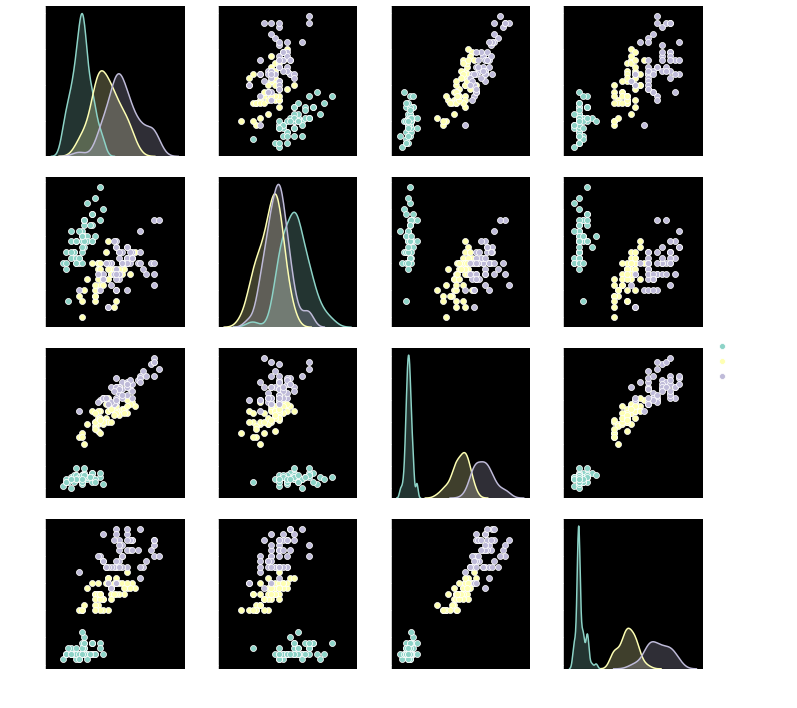

In [2]:
sns.pairplot(iris, hue='species');

# Как использовать Scikit-Learn estimator API    
1) Choose a class of model by importing the appropriate estimator class from Scikit-Learn.

2) Choose model hyperparameters by instantiating this class with desired values.

3) Arrange data into a features matrix and target vector following the discussion above.

4) Fit the model to your data by calling the fit() method of the model instance.

5) Apply the Model to new data:

  5.1) For supervised learning, often we predict labels for unknown data using the predict() method.
  
  5.2) For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

# Пример 1 - supervised learning

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

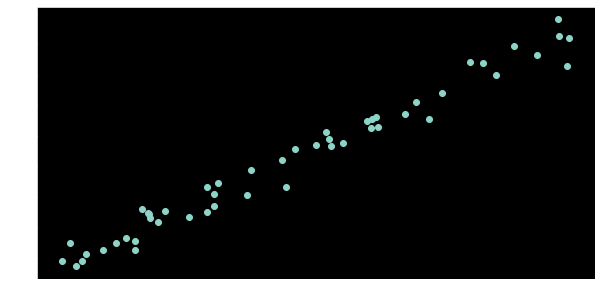

In [3]:
# применим простую линейную регрессию для этих данных:

rng = np.random.RandomState(42)
x = 10 * rng.rand(50) # rand - случайные равнораспределенные значения (от 0 до 1)
y = 2 * x - 1 + rng.randn(50) # randn - случайные нормальнораспределенные значения
plt.figure(figsize=(10, 5))
plt.scatter(x, y);
x

In [4]:
# этап 1 - выберем класс модели (в sklearn каждый класс модели это питоновский класс)

from sklearn.linear_model import LinearRegression

In [14]:
# этап 2 - выберем гиперпараметры модели (так сказать, её настройки)

# An important point is that a class of model is not the same
# as an instance of a model. Once we have decided on our model class,
# there are still some options open to us. Depending on the model class
# we are working with, we might need to answer one or more questions

# иницилизурем нашу модель с выбранными настройками
model = LinearRegression(fit_intercept=True)
model

# здесь мы ставим fit the intercept = True, чтобы y-intercept был не
# нулевым, а выбранным в соответствии с данными

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# этап 3 - подготовка данных (формируем features matrix и target vector)

# Y уже в нужной нам форме - векторе, а вот Х нужно перевести из вектора в
# массив [number of samples, number of features]
Y = y
X = x[:,  np.newaxis] # перевели одинарный массив в двумерный и вертикальный
X[:5]

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ]])

In [7]:
# этап 4 - применить модель к нашим данным

model.fit(X, Y)

# функция .fit() запускает набор математических вычислений над нашими данными
# и сохраняет их в model-specific attributes, которые мы можем посмотреть.
# для удобства, в sclrn все параметры модели изученные во время .fit() имеют
# trailing underscores; for example in this linear model, we have the following:
print(' slope = ', model.coef_, '\n', 'intercept = ', model.intercept_)

# можно увидеть что эти значения близки к тем slope и intercept которые задали
# мы при создании данных: y = 2 * x - 1 + rng.randn(50)

# важный момент - Scikit-Learn does not provide tools to draw conclusions from
# internal model parameters themselves: interpreting model parameters is much
# more a statistical modeling question than a machine learning question.
# Machine learning rather focuses on what the model predicts. If you would
# like to dive into the meaning of fit parameters within the model, other
# tools are available, including the Statsmodels Python package.

 slope =  [1.9776566] 
 intercept =  -0.9033107255311164


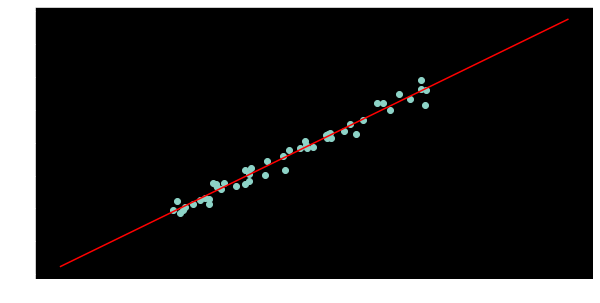

In [8]:
# этап 5 - предсказание
# главная задача обучения с учителем - предсказание значений для новых наборов
# данных. Осуществляется это методом .predict()

# в рамках этого примера возьмем в качестве "новых" данных набор значений Х
xfit = np.linspace(-4, 15)

# подготовим их для использования в модели
Xfit = xfit[:, np.newaxis]

# "предскажем" значения Y для нового набора данных
Yfit = model.predict(Xfit)

# выведем на экран данные на которых модель обучалась и результат предсказания 
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(Xfit, Yfit, color='Red');

# мы скормили модели значения х, и "правильные" значения у, она обучилась на них
# затем мы дали ей новые значения х, и она подобрала для них значения у
# красная линия показывает какие значения У модель подобрала для введенных нами
# значений Х (которые у нас от -4 до +15)

# Пример 2 - supervised learning, classification с датасетом Iris

In [9]:
# решим проблему классификации цветов из датасета iris

# подготовим Х и У матрицы
X_iris = iris.drop('species', axis='columns')
y_iris = iris['species']


# теперь мы готовы к использованию Scikit-Learn
# разделим датасет iris на сет для тренировки и сет для проверки
# train_test_split - Split arrays or matrices into random train and test subsets

from sklearn.model_selection import train_test_split 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_iris, y_iris, random_state=1)

In [10]:
# будем использовать Gaussian naive Bayes - простую модель классификации, в
# которой даже нет гиперпараметров. Она быстро работает и хорошо подходит
# для базовой/начальной классификации (которую затем можно дорабатывать другими
# более сложными моделями)

from sklearn.naive_bayes import GaussianNB  # 1. choose model class
model = GaussianNB()                        # 2. instantiate model
model.fit(Xtrain, Ytrain)                   # 3. fit model to data
Y_model = model.predict(Xtest)              # 4. predict on new data

In [11]:
# сравним полученные результаты и правильными значениями

# accuracy_score(y_true, y_pred,...), метод показывающий точность нашего
# предсказания по отношению к истинным значениям
from sklearn.metrics import accuracy_score 
accuracy_score(Ytest, Y_model)

0.9736842105263158

# Пример 3 - unsupervised learning, reducing the dimensionality с датасетом Iris

 До РСА =  (150, 4) 
 После РСА =  (150, 2)


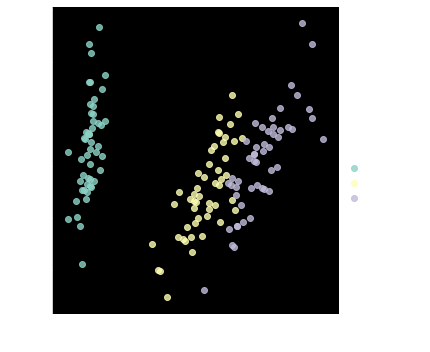

In [12]:
# As an example of an unsupervised learning problem, let's take a look at
# reducing the dimensionality of the Iris data so as to more easily visualize
# it. Recall that the Iris data is four dimensional: there are four features
# recorded for each sample.
# The task of dimensionality reduction is to ask whether there is a suitable
# lower-dimensional representation that retains the essential features of the
# data. Often dimensionality reduction is used as an aid to visualizing data

from sklearn.decomposition import PCA # 1. Choose the model clas
model = PCA(n_components=2)    # 2. Instantiate the model with hyperparameters
model.fit(X_iris)           # 3. Fit to data. Notice that 'Y' is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions
print(' До РСА = ', X_iris.shape, '\n', 'После РСА = ', X_2D.shape)
# мы скормили модели наши параметры (Х) и попросили её трансформировать эти
# данные (которые 4D) в 2D

# выведем результат на экран добавив полученные результаты в исходный фрейм
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False);

# fit_reg - If `True`, estimate and plot a regression model relating the `x`
# and ``y`` variables. Нам это сейчас не нужно, поэтому поставили False

# как можем видеть, даже после "сжатия" через РСА (который к тому же не знал
# о том что ему дали данные трех разных видов цветов) на графике все три группы
# цветов четко разделены

# Пример 4 - Unsupervised learning, clustering с датасетом iris

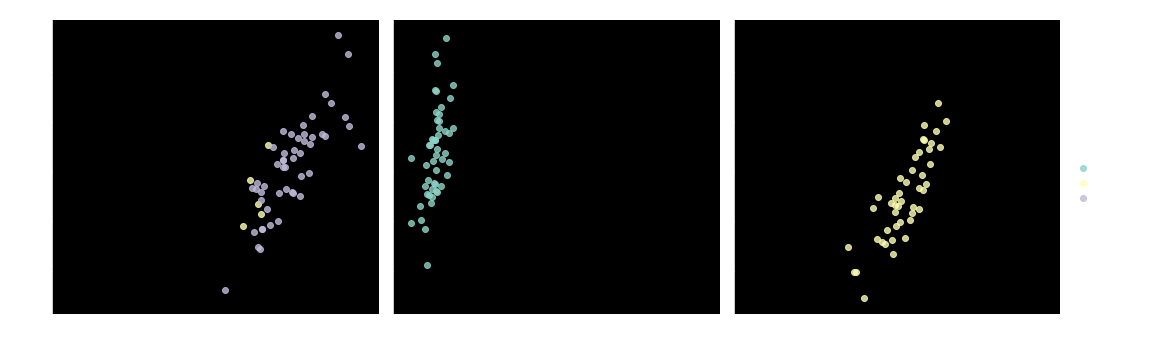

In [13]:
# A clustering algorithm attempts to find distinct groups of data without
# reference to any labels
# Here we will use a powerful clustering method called a Gaussian mixture model
# Gaussian mixture attempts to model the data as a collection of Gaussian blobs.

# 1. Choose the model class
from sklearn.mixture import GaussianMixture 

# 2. Instantiate the model with hyperparameters
model = GaussianMixture(n_components=3, covariance_type='full')

# 3. Fit to data. Notice Y is not specified!
model.fit(X_iris)           

# 4. Determine cluster labels
y_gmm = model.predict(X_iris)

# добавим полученные данные в датасет и выведем на экран 3 полученных кластера
# в виде ранее полученного набора двумерных данных (из РСА transform)
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

# как можно видеть 'setosa' была определенна GMM безошибочно, а вот у 'versicolor'
# и 'virginica' есть небольшое "смешение".
# т.е. мы может самостоятельно (без информации о том что у нас есть 3 вида
# цветков) определить что в данном сете есть 3 разные группы объектов, опираясь
# только на их характеристики

# Пример 5 - Unsupervised learning, числа написанные рукой

(1797, 8, 8)


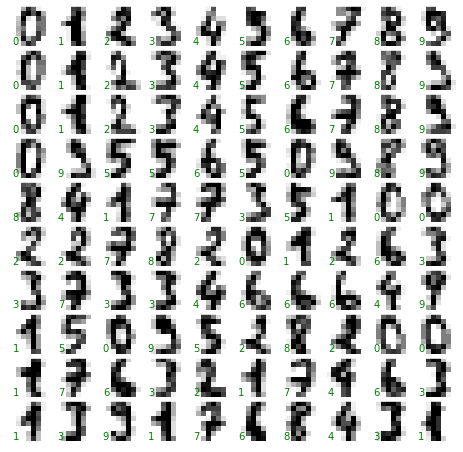

In [58]:
# загрузим набор фоток с написаными числами и посмотрим как эти данные выглядят
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.images.shape) # видим что у нас 1797 картинок 8 на 8 пикселей

# выведем на экран первые несколько их них
import matplotlib.pyplot as plt

# хитрый код для визуалиции
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [59]:
# чтобы использовать эти данные в sclearn нам нужно вытащить из них samples и features
# по которым будет идти обучение. Мы сделаем это приняв каждый пиксель изображения как
# feature (т.е. на каждый образец у нас будет 64 feature). В этом датасете это уже сделано
# за нас - в атрибуте data лежат эти 64 feature
# правильные значения (или "ответы", нужный нам target array) тоже подготовленны заранее
# они лежат в атрибуте target

X = digits.data
y = digits.target
print(X, X.shape, '\n\n', y, y.shape)
# вот наши 1797 samples и их 64 features

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] (1797, 64) 

 [0 1 2 ... 8 9 8] (1797,)


In [60]:
# 64 feature сложно визуализировать (64-х мерное пространство, хуле) поэтому уменьшим его
# до 2D используя manifold learning algorithm called Isomap

from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

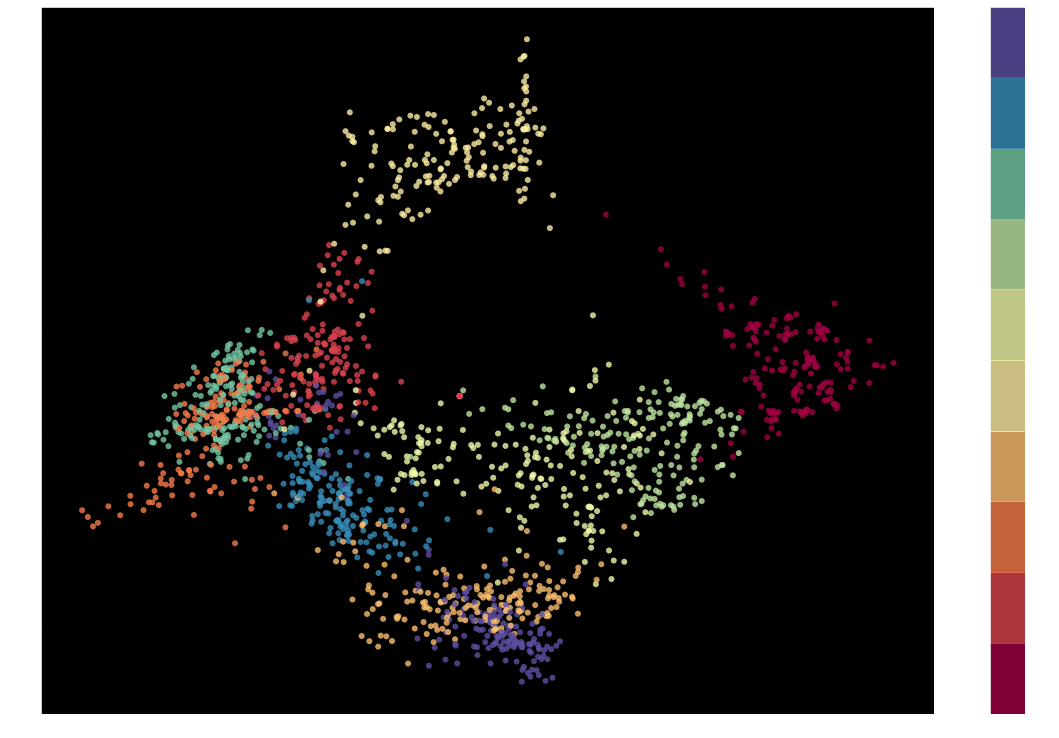

In [67]:
# выведем на экран двумерное представление наших features
plt.rcParams["figure.figsize"] = (20,13) # размер рисунка

# очеред
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('Spectral', 10))

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5); # set color limits for colorbar

# видим что группы довольно хорошо разделенны, за исключением чисел 5 и 6, 2 и 7, 3 и 9
# попробуем применить простой алгоритм классификации - Gaussian naive Bayes model

In [70]:
# подготовим датасет к обучению и последующей проверке
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

# применим модель классификации к нашим данным
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

# проверим точность
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

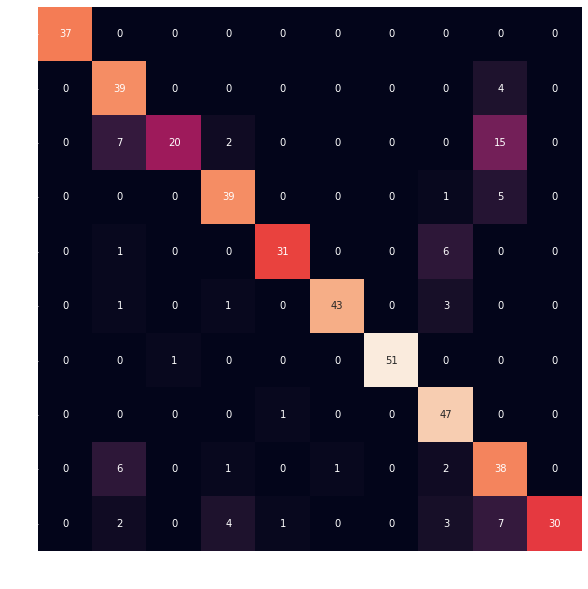

In [83]:
# 0.833 - неплохой результат для такой простой модели, однако мы хотим понять что мы сделали
# не так и не получили результат выше. Для этого мы построим confusion matrix

from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(ytest, y_model)

plt.rcParams["figure.figsize"] = (10, 10) # размер рисунка
sns.heatmap(c_matrix, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

# ось Х - то что предсказала модель, ось У - то что на самом деле. Смотрим на диагональ - чем
# на ней больше значений тем лучше. Если значения есть НЕ на диагонали значит это ошибки
# модели, и по их положению мы можем понять что и с чем путала наша модель

# у нас больше всего косяков с оценкой двойки - её 15 раз путали с восьмёркой и 7 раз с единицей

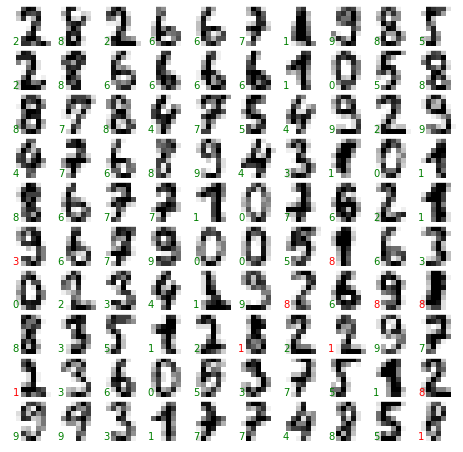

In [84]:
# еще один способ понять что пошло не так - вывести ещё раз наши данные и подписать их
# предсказанными значениями

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)
# опять хитрый код, но пока на него забей
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')